In [1]:
%matplotlib inline
# Important for using matplotlib w/ Ipython Notebook
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import graphviz as gv

import random
import numpy as np

import math

import sys
import os

from __future__ import division

In [2]:
def GraphIt(V, E, w={}, D=True, C={}):
    'Plots a graph'
    G = gv.Digraph(filename='graph', format='png') if D else gv.Graph(filename='graph', format='png')
        
    for v in V:
        G.node(str(v))
    for u in E:
        for v in E.get(u, []):
            if not D and u>v: continue
            if (u,v) in C or ((v,u) in C and not D):
                G.edge(str(u),str(v), label = str(w.get((u,v), '')), color='blue')
            else:
                G.edge(str(u),str(v), label = str(w.get((u,v), '')))
    G.render()
    img=mpimg.imread('graph.png')

    fig, ax = plt.subplots(frameon=False)
    fig.set_size_inches(7,7)
    imgplot = plt.imshow(img)

    ax.axis('off')
    plt.box(on=None) 
    plt.show()  
    print "Vertex: Edge List"
    for u in V:
        print u, ": ", E.get(u, [])

def ReadGraph(N, filename):
    V = range(1,N+1)
    E = {}
    f = open(filename)
    for line in f:
        l = [int(i) for i in line.strip().split(" ")]
        e = E.get(l[0],[])
        e.append(l[1])
        e.sort()
        E[l[0]] = e
    return V, E

In [6]:
def Path(P, u):
    ret = [u]
    v = P[u]
    while v:
        ret.append(v)
        u, v = v, P[v]
    ret.reverse()
    return ret

def BFS(V, E, s):
    Color = {}
    Distance = {}
    Parent = {}
    for u in V:
        Color[u] = 0
        Distance[u] = sys.maxint
        Parent[u] = 0
    Color[s] = 1
    Distance[s] = 0
    Q = [s]
    while Q:
        u =Q.pop()
        for v in E.get(u,[]):
            if not Color[v]:
                Color[v] = 1
                Distance[v] = Distance[u] + 1
                Parent[v] = u
                Q.insert(0, v)
        Color[u] = 2
    return Color, Distance, Parent

In [7]:
COLOR    = {}
DISCOVER = {}
PARENT   = {}
FINISH = {}
TIME = 0
ETYPE = {}

def DFS(V, E):
    global COLOR, DISCOVER, PARENT, FINISH, TIME, ETYPE
    COLOR.clear()
    DISCOVER.clear()
    PARENT.clear()
    FINISH.clear()
    TIME = 0
    ETYPE.clear()
    for u in V:
        if not COLOR.get(u, 0): DFS_Visit(E, u)
    
def DFS_Visit(E, u):
    global COLOR, DISCOVER, PARENT, FINISH, TIME, ETYPE
    TIME += 1
    DISCOVER[u] = TIME
    COLOR[u] = 1
    for v in E.get(u, []):
        if not COLOR.get(v,0):
            ETYPE[(u,v)] = 'Tree'
            PARENT[v] = u
            DFS_Visit(E, v)
        elif COLOR.get(v,0) == 1:
            ETYPE[(u,v)]= 'Back'
        elif COLOR.get(v,0)==2 and DISCOVER[u]<DISCOVER[v]:
            ETYPE[(u,v)]='Forward'
        elif COLOR.get(v,0)==2 and DISCOVER[u]>DISCOVER[v]:
            ETYPE[(u,v)]='Cross'
        else:
            raise Exception('Weird Error')
        
    COLOR[u] = 2
    TIME += 1
    FINISH[u] = TIME 

{1: [9, 10], 2: [5, 6], 3: [4, 5], 4: [5, 8, 9], 5: [1], 6: [10], 7: [9], 8: [1, 2], 9: [7], 10: [3, 5, 7]}


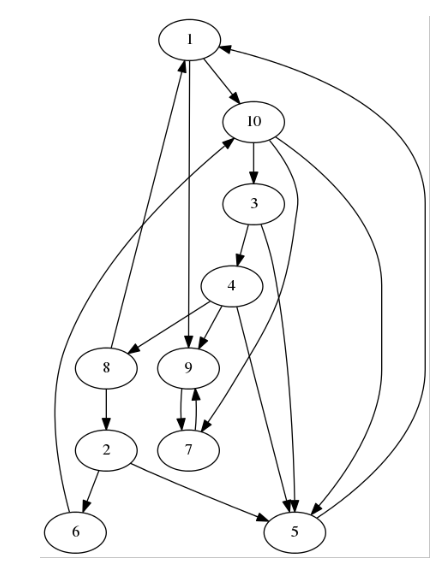

Vertex: Edge List
1 :  [9, 10]
2 :  [5, 6]
3 :  [4, 5]
4 :  [5, 8, 9]
5 :  [1]
6 :  [10]
7 :  [9]
8 :  [1, 2]
9 :  [7]
10 :  [3, 5, 7]


In [8]:
gf = "graph1.txt"
V, E = ReadGraph(10, gf)
print E
GraphIt(V, E)

In [10]:
c, d, p = BFS(V, E, 1)
print "Vertex: Distance [Path]"
for u in d:
    print u,": ", d[u], Path(p, u)

Vertex: Distance [Path]
1 :  0 [1]
2 :  5 [1, 10, 3, 4, 8, 2]
3 :  2 [1, 10, 3]
4 :  3 [1, 10, 3, 4]
5 :  2 [1, 10, 5]
6 :  6 [1, 10, 3, 4, 8, 2, 6]
7 :  2 [1, 9, 7]
8 :  4 [1, 10, 3, 4, 8]
9 :  1 [1, 9]
10 :  1 [1, 10]


In [9]:
DFS(V, E)

for u in DISCOVER:
    print 'Discover/Finish: ', u, ':', DISCOVER[u], FINISH[u]
    
tree = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Tree']
back = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Back']
forward = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Forward']
cross = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Cross']

tree.sort()
back.sort()
forward.sort()
cross.sort()
print 'Tree: ', tree
print 'Back: ', back
print 'Forward: ', forward
print 'Cross: ', cross
print "Vertices in Topological Order: ",   [x[1] for x in sorted([(FINISH[u],u) for u in FINISH],
                                                                 reverse=True, key=lambda x: x[0])]

Discover/Finish:  1 : 1 20
Discover/Finish:  2 : 12 15
Discover/Finish:  3 : 7 18
Discover/Finish:  4 : 8 17
Discover/Finish:  5 : 9 10
Discover/Finish:  6 : 13 14
Discover/Finish:  7 : 3 4
Discover/Finish:  8 : 11 16
Discover/Finish:  9 : 2 5
Discover/Finish:  10 : 6 19
Tree:  [(1, 9), (1, 10), (2, 6), (3, 4), (4, 5), (4, 8), (8, 2), (9, 7), (10, 3)]
Back:  [(5, 1), (6, 10), (7, 9), (8, 1)]
Forward:  [(3, 5), (10, 5)]
Cross:  [(2, 5), (4, 9), (10, 7)]
Vertices in Topological Order:  [1, 10, 3, 4, 8, 2, 6, 5, 9, 7]


{1: [8], 2: [1, 3, 5], 3: [4, 9, 10], 4: [8, 10], 5: [4, 10], 6: [5, 10], 7: [9], 8: [9], 9: [1, 2], 10: [6]}


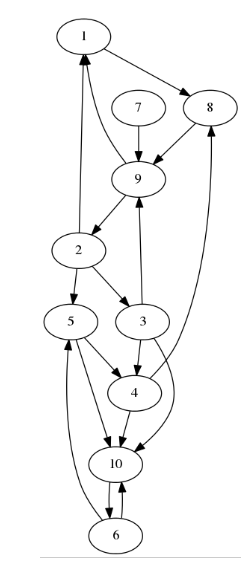

Vertex: Edge List
1 :  [8]
2 :  [1, 3, 5]
3 :  [4, 9, 10]
4 :  [8, 10]
5 :  [4, 10]
6 :  [5, 10]
7 :  [9]
8 :  [9]
9 :  [1, 2]
10 :  [6]


In [12]:
gf = "graph2.txt"
V, E = ReadGraph(10, gf)
print E
GraphIt(V, E)

In [13]:
c, d, p = BFS(V, E, 1)
print "Vertex: Distance [Path]"
for u in d:
    print u,": ", d[u], Path(p, u)

Vertex: Distance [Path]
1 :  0 [1]
2 :  3 [1, 8, 9, 2]
3 :  4 [1, 8, 9, 2, 3]
4 :  5 [1, 8, 9, 2, 3, 4]
5 :  4 [1, 8, 9, 2, 5]
6 :  6 [1, 8, 9, 2, 3, 10, 6]
7 :  9223372036854775807 [7]
8 :  1 [1, 8]
9 :  2 [1, 8, 9]
10 :  5 [1, 8, 9, 2, 3, 10]


In [14]:
DFS(V, E)

for u in DISCOVER:
    print 'Discover/Finish: ', u, ':', DISCOVER[u], FINISH[u]
    
tree = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Tree']
back = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Back']
forward = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Forward']
cross = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Cross']

tree.sort()
back.sort()
forward.sort()
cross.sort()
print 'Tree: ', tree
print 'Back: ', back
print 'Forward: ', forward
print 'Cross: ', cross
print "Vertices in Topological Order: ",   [x[1] for x in sorted([(FINISH[u],u) for u in FINISH],
                                                                 reverse=True, key=lambda x: x[0])]

Discover/Finish:  1 : 1 18
Discover/Finish:  2 : 4 15
Discover/Finish:  3 : 5 14
Discover/Finish:  4 : 6 13
Discover/Finish:  5 : 9 10
Discover/Finish:  6 : 8 11
Discover/Finish:  7 : 19 20
Discover/Finish:  8 : 2 17
Discover/Finish:  9 : 3 16
Discover/Finish:  10 : 7 12
Tree:  [(1, 8), (2, 3), (3, 4), (4, 10), (6, 5), (8, 9), (9, 2), (10, 6)]
Back:  [(2, 1), (3, 9), (4, 8), (5, 4), (5, 10), (6, 10), (9, 1)]
Forward:  [(2, 5), (3, 10)]
Cross:  [(7, 9)]
Vertices in Topological Order:  [7, 1, 8, 9, 2, 3, 4, 10, 6, 5]


{1: [8], 2: [1, 3, 7], 3: [2, 6], 4: [2], 5: [6], 7: [3, 8], 8: [3, 4, 9], 9: [6, 8, 10], 10: [1, 9]}


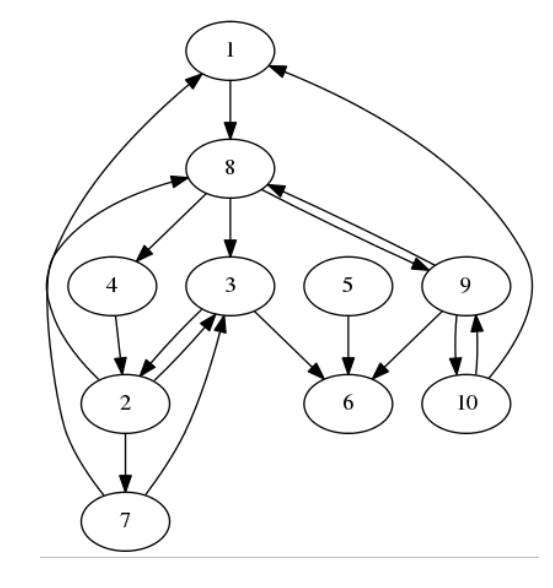

Vertex: Edge List
1 :  [8]
2 :  [1, 3, 7]
3 :  [2, 6]
4 :  [2]
5 :  [6]
6 :  []
7 :  [3, 8]
8 :  [3, 4, 9]
9 :  [6, 8, 10]
10 :  [1, 9]


In [15]:
gf = "graph3.txt"
V, E = ReadGraph(10, gf)
print E
GraphIt(V, E)

In [16]:
c, d, p = BFS(V, E, 1)
print "Vertex: Distance [Path]"
for u in d:
    print u,": ", d[u], Path(p, u)

Vertex: Distance [Path]
1 :  0 [1]
2 :  3 [1, 8, 3, 2]
3 :  2 [1, 8, 3]
4 :  2 [1, 8, 4]
5 :  9223372036854775807 [5]
6 :  3 [1, 8, 3, 6]
7 :  4 [1, 8, 3, 2, 7]
8 :  1 [1, 8]
9 :  2 [1, 8, 9]
10 :  3 [1, 8, 9, 10]


In [17]:
DFS(V, E)

for u in DISCOVER:
    print 'Discover/Finish: ', u, ':', DISCOVER[u], FINISH[u]
    
tree = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Tree']
back = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Back']
forward = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Forward']
cross = [(u,v) for (u,v) in ETYPE if ETYPE[(u,v)]=='Cross']

tree.sort()
back.sort()
forward.sort()
cross.sort()
print 'Tree: ', tree
print 'Back: ', back
print 'Forward: ', forward
print 'Cross: ', cross
print "Vertices in Topological Order: ",   [x[1] for x in sorted([(FINISH[u],u) for u in FINISH],
                                                                 reverse=True, key=lambda x: x[0])]

Discover/Finish:  1 : 1 18
Discover/Finish:  2 : 4 7
Discover/Finish:  3 : 3 10
Discover/Finish:  4 : 11 12
Discover/Finish:  5 : 19 20
Discover/Finish:  6 : 8 9
Discover/Finish:  7 : 5 6
Discover/Finish:  8 : 2 17
Discover/Finish:  9 : 13 16
Discover/Finish:  10 : 14 15
Tree:  [(1, 8), (2, 7), (3, 2), (3, 6), (8, 3), (8, 4), (8, 9), (9, 10)]
Back:  [(2, 1), (2, 3), (7, 3), (7, 8), (9, 8), (10, 1), (10, 9)]
Forward:  []
Cross:  [(4, 2), (5, 6), (9, 6)]
Vertices in Topological Order:  [5, 1, 8, 9, 10, 4, 3, 6, 2, 7]
